In [2]:
from torch.autograd import Variable

import VAE_NN
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torch.optim import Adagrad

In [4]:
test = VAE_NN.VAE_Net()
# Potentially apply weight initialisation here if we don't do it inside the VAE class

In [5]:
test.cuda()

VAE_Net(
  (ei): Linear(in_features=784, out_features=500)
  (em): Linear(in_features=500, out_features=20)
  (ev): Linear(in_features=500, out_features=20)
  (di): Linear(in_features=20, out_features=500)
  (do): Linear(in_features=500, out_features=784)
)

In [6]:
optimizer = Adagrad(test.parameters(),lr=1e-2)

In [7]:
train_data,_ = VAE_NN.get_data_loaders(b_size=128)

Processing...
Done!


In [8]:
import time

In [8]:
t = time.time()
ep = 100
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = ep)
t_e = time.time() - t
print('Seconds for %d epcohs: %d' % (ep,t_e))

  0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch: 0 [0/60000 (0%)]	Loss: 71238.164062
Train Epoch: 0 [12800/60000 (21%)]	Loss: 25077.691406
Train Epoch: 0 [25600/60000 (43%)]	Loss: 24367.503906
Train Epoch: 0 [38400/60000 (64%)]	Loss: 22750.990234
Train Epoch: 0 [51200/60000 (85%)]	Loss: 21603.566406


  1%|          | 1/100 [00:06<11:31,  6.98s/it]

Train Epoch: 1 [0/60000 (0%)]	Loss: 21166.978516
Train Epoch: 1 [12800/60000 (21%)]	Loss: 20659.572266
Train Epoch: 1 [25600/60000 (43%)]	Loss: 21143.654297
Train Epoch: 1 [38400/60000 (64%)]	Loss: 20356.892578
Train Epoch: 1 [51200/60000 (85%)]	Loss: 20509.365234


  2%|▏         | 2/100 [00:13<11:19,  6.94s/it]

Train Epoch: 2 [0/60000 (0%)]	Loss: 19806.835938
Train Epoch: 2 [12800/60000 (21%)]	Loss: 19786.804688
Train Epoch: 2 [25600/60000 (43%)]	Loss: 20537.869141
Train Epoch: 2 [38400/60000 (64%)]	Loss: 19316.470703
Train Epoch: 2 [51200/60000 (85%)]	Loss: 20774.287109


  3%|▎         | 3/100 [00:20<11:11,  6.92s/it]

Train Epoch: 3 [0/60000 (0%)]	Loss: 19088.064453
Train Epoch: 3 [12800/60000 (21%)]	Loss: 18683.175781
Train Epoch: 3 [25600/60000 (43%)]	Loss: 19672.285156
Train Epoch: 3 [38400/60000 (64%)]	Loss: 18091.320312
Train Epoch: 3 [51200/60000 (85%)]	Loss: 19041.621094


  4%|▍         | 4/100 [00:27<10:58,  6.86s/it]

Train Epoch: 4 [0/60000 (0%)]	Loss: 19274.128906
Train Epoch: 4 [12800/60000 (21%)]	Loss: 20510.931641
Train Epoch: 4 [25600/60000 (43%)]	Loss: 19485.150391
Train Epoch: 4 [38400/60000 (64%)]	Loss: 19045.082031
Train Epoch: 4 [51200/60000 (85%)]	Loss: 17194.601562


  5%|▌         | 5/100 [00:34<10:47,  6.81s/it]

Train Epoch: 5 [0/60000 (0%)]	Loss: 20382.939453
Train Epoch: 5 [12800/60000 (21%)]	Loss: 17563.107422
Train Epoch: 5 [25600/60000 (43%)]	Loss: 18001.785156
Train Epoch: 5 [38400/60000 (64%)]	Loss: 17339.824219
Train Epoch: 5 [51200/60000 (85%)]	Loss: 17808.136719


  6%|▌         | 6/100 [00:41<10:42,  6.83s/it]

Train Epoch: 6 [0/60000 (0%)]	Loss: 17899.396484
Train Epoch: 6 [12800/60000 (21%)]	Loss: 16729.035156
Train Epoch: 6 [25600/60000 (43%)]	Loss: 17536.492188
Train Epoch: 6 [38400/60000 (64%)]	Loss: 15969.230469
Train Epoch: 6 [51200/60000 (85%)]	Loss: 16488.437500


  7%|▋         | 7/100 [00:47<10:36,  6.84s/it]

Train Epoch: 7 [0/60000 (0%)]	Loss: 16707.035156
Train Epoch: 7 [12800/60000 (21%)]	Loss: 17043.570312
Train Epoch: 7 [25600/60000 (43%)]	Loss: 16143.942383
Train Epoch: 7 [38400/60000 (64%)]	Loss: 16289.344727
Train Epoch: 7 [51200/60000 (85%)]	Loss: 17010.134766


  8%|▊         | 8/100 [00:54<10:32,  6.87s/it]

Train Epoch: 8 [0/60000 (0%)]	Loss: 16737.683594
Train Epoch: 8 [12800/60000 (21%)]	Loss: 16643.851562
Train Epoch: 8 [25600/60000 (43%)]	Loss: 17461.050781
Train Epoch: 8 [38400/60000 (64%)]	Loss: 16038.689453
Train Epoch: 8 [51200/60000 (85%)]	Loss: 16069.710938


  9%|▉         | 9/100 [01:01<10:26,  6.89s/it]

Train Epoch: 9 [0/60000 (0%)]	Loss: 16621.638672
Train Epoch: 9 [12800/60000 (21%)]	Loss: 16074.758789
Train Epoch: 9 [25600/60000 (43%)]	Loss: 16475.019531
Train Epoch: 9 [38400/60000 (64%)]	Loss: 17480.240234
Train Epoch: 9 [51200/60000 (85%)]	Loss: 16910.031250


 10%|█         | 10/100 [01:08<10:20,  6.90s/it]

Train Epoch: 10 [0/60000 (0%)]	Loss: 17185.662109
Train Epoch: 10 [12800/60000 (21%)]	Loss: 16636.300781
Train Epoch: 10 [25600/60000 (43%)]	Loss: 16461.980469
Train Epoch: 10 [38400/60000 (64%)]	Loss: 16595.500000
Train Epoch: 10 [51200/60000 (85%)]	Loss: 16820.349609


 11%|█         | 11/100 [01:15<10:14,  6.90s/it]

Train Epoch: 11 [0/60000 (0%)]	Loss: 15769.461914
Train Epoch: 11 [12800/60000 (21%)]	Loss: 16298.336914
Train Epoch: 11 [25600/60000 (43%)]	Loss: 16514.953125
Train Epoch: 11 [38400/60000 (64%)]	Loss: 15850.718750
Train Epoch: 11 [51200/60000 (85%)]	Loss: 16328.410156


 12%|█▏        | 12/100 [01:22<10:06,  6.89s/it]

Train Epoch: 12 [0/60000 (0%)]	Loss: 15817.557617
Train Epoch: 12 [12800/60000 (21%)]	Loss: 16195.849609
Train Epoch: 12 [25600/60000 (43%)]	Loss: 16803.878906
Train Epoch: 12 [38400/60000 (64%)]	Loss: 16861.472656
Train Epoch: 12 [51200/60000 (85%)]	Loss: 16212.093750


 13%|█▎        | 13/100 [01:29<09:57,  6.87s/it]

Train Epoch: 13 [0/60000 (0%)]	Loss: 16290.955078
Train Epoch: 13 [12800/60000 (21%)]	Loss: 15346.379883
Train Epoch: 13 [25600/60000 (43%)]	Loss: 16794.046875
Train Epoch: 13 [38400/60000 (64%)]	Loss: 15539.044922
Train Epoch: 13 [51200/60000 (85%)]	Loss: 15437.353516


 14%|█▍        | 14/100 [01:36<09:50,  6.87s/it]

Train Epoch: 14 [0/60000 (0%)]	Loss: 16346.996094
Train Epoch: 14 [12800/60000 (21%)]	Loss: 16390.035156
Train Epoch: 14 [25600/60000 (43%)]	Loss: 15609.429688
Train Epoch: 14 [38400/60000 (64%)]	Loss: 15696.193359
Train Epoch: 14 [51200/60000 (85%)]	Loss: 15333.469727


 15%|█▌        | 15/100 [01:43<09:46,  6.89s/it]

Train Epoch: 15 [0/60000 (0%)]	Loss: 16257.676758
Train Epoch: 15 [12800/60000 (21%)]	Loss: 16137.456055
Train Epoch: 15 [25600/60000 (43%)]	Loss: 15862.574219
Train Epoch: 15 [38400/60000 (64%)]	Loss: 15923.069336
Train Epoch: 15 [51200/60000 (85%)]	Loss: 15858.326172


 16%|█▌        | 16/100 [01:50<09:39,  6.90s/it]

Train Epoch: 16 [0/60000 (0%)]	Loss: 15134.656250
Train Epoch: 16 [12800/60000 (21%)]	Loss: 15188.158203
Train Epoch: 16 [25600/60000 (43%)]	Loss: 15510.322266
Train Epoch: 16 [38400/60000 (64%)]	Loss: 14445.368164
Train Epoch: 16 [51200/60000 (85%)]	Loss: 16070.646484


 17%|█▋        | 17/100 [01:57<09:33,  6.91s/it]

Train Epoch: 17 [0/60000 (0%)]	Loss: 14984.748047
Train Epoch: 17 [12800/60000 (21%)]	Loss: 15128.180664
Train Epoch: 17 [25600/60000 (43%)]	Loss: 16982.169922
Train Epoch: 17 [38400/60000 (64%)]	Loss: 15650.901367
Train Epoch: 17 [51200/60000 (85%)]	Loss: 15062.507812


 18%|█▊        | 18/100 [02:04<09:25,  6.90s/it]

Train Epoch: 18 [0/60000 (0%)]	Loss: 15330.587891
Train Epoch: 18 [12800/60000 (21%)]	Loss: 15659.704102
Train Epoch: 18 [25600/60000 (43%)]	Loss: 15701.193359
Train Epoch: 18 [38400/60000 (64%)]	Loss: 15443.455078
Train Epoch: 18 [51200/60000 (85%)]	Loss: 15504.418945


 19%|█▉        | 19/100 [02:10<09:17,  6.89s/it]

Train Epoch: 19 [0/60000 (0%)]	Loss: 15655.376953
Train Epoch: 19 [12800/60000 (21%)]	Loss: 14130.699219
Train Epoch: 19 [25600/60000 (43%)]	Loss: 16508.292969
Train Epoch: 19 [38400/60000 (64%)]	Loss: 15145.490234
Train Epoch: 19 [51200/60000 (85%)]	Loss: 15015.862305


 20%|██        | 20/100 [02:17<09:09,  6.87s/it]

Train Epoch: 20 [0/60000 (0%)]	Loss: 14685.887695
Train Epoch: 20 [12800/60000 (21%)]	Loss: 14485.342773
Train Epoch: 20 [25600/60000 (43%)]	Loss: 15794.404297
Train Epoch: 20 [38400/60000 (64%)]	Loss: 14364.022461
Train Epoch: 20 [51200/60000 (85%)]	Loss: 14760.242188


 21%|██        | 21/100 [02:23<09:00,  6.85s/it]

Train Epoch: 21 [0/60000 (0%)]	Loss: 16001.430664
Train Epoch: 21 [12800/60000 (21%)]	Loss: 15288.425781
Train Epoch: 21 [25600/60000 (43%)]	Loss: 14308.797852
Train Epoch: 21 [38400/60000 (64%)]	Loss: 15189.230469
Train Epoch: 21 [51200/60000 (85%)]	Loss: 14736.291016


 22%|██▏       | 22/100 [02:30<08:52,  6.83s/it]

Train Epoch: 22 [0/60000 (0%)]	Loss: 15646.350586
Train Epoch: 22 [12800/60000 (21%)]	Loss: 14331.828125
Train Epoch: 22 [25600/60000 (43%)]	Loss: 14941.367188
Train Epoch: 22 [38400/60000 (64%)]	Loss: 14646.053711
Train Epoch: 22 [51200/60000 (85%)]	Loss: 14254.117188


 23%|██▎       | 23/100 [02:37<08:45,  6.83s/it]

Train Epoch: 23 [0/60000 (0%)]	Loss: 14469.333984
Train Epoch: 23 [12800/60000 (21%)]	Loss: 15081.027344
Train Epoch: 23 [25600/60000 (43%)]	Loss: 15960.898438
Train Epoch: 23 [38400/60000 (64%)]	Loss: 14111.111328
Train Epoch: 23 [51200/60000 (85%)]	Loss: 14105.764648


 24%|██▍       | 24/100 [02:43<08:38,  6.82s/it]

Train Epoch: 24 [0/60000 (0%)]	Loss: 14353.929688
Train Epoch: 24 [12800/60000 (21%)]	Loss: 14395.704102
Train Epoch: 24 [25600/60000 (43%)]	Loss: 15229.396484
Train Epoch: 24 [38400/60000 (64%)]	Loss: 14588.466797
Train Epoch: 24 [51200/60000 (85%)]	Loss: 14455.652344


 25%|██▌       | 25/100 [02:50<08:31,  6.82s/it]

Train Epoch: 25 [0/60000 (0%)]	Loss: 14426.007812
Train Epoch: 25 [12800/60000 (21%)]	Loss: 15065.474609
Train Epoch: 25 [25600/60000 (43%)]	Loss: 14686.050781
Train Epoch: 25 [38400/60000 (64%)]	Loss: 13934.541992
Train Epoch: 25 [51200/60000 (85%)]	Loss: 14320.027344


 26%|██▌       | 26/100 [02:57<08:24,  6.81s/it]

Train Epoch: 26 [0/60000 (0%)]	Loss: 14273.757812
Train Epoch: 26 [12800/60000 (21%)]	Loss: 15707.819336
Train Epoch: 26 [25600/60000 (43%)]	Loss: 14669.966797
Train Epoch: 26 [38400/60000 (64%)]	Loss: 13633.673828
Train Epoch: 26 [51200/60000 (85%)]	Loss: 14598.974609


 27%|██▋       | 27/100 [03:03<08:16,  6.80s/it]

Train Epoch: 27 [0/60000 (0%)]	Loss: 13765.862305
Train Epoch: 27 [12800/60000 (21%)]	Loss: 15288.518555
Train Epoch: 27 [25600/60000 (43%)]	Loss: 14069.995117
Train Epoch: 27 [38400/60000 (64%)]	Loss: 14932.009766
Train Epoch: 27 [51200/60000 (85%)]	Loss: 14034.585938


 28%|██▊       | 28/100 [03:10<08:09,  6.79s/it]

Train Epoch: 28 [0/60000 (0%)]	Loss: 14532.796875
Train Epoch: 28 [12800/60000 (21%)]	Loss: 14706.564453
Train Epoch: 28 [25600/60000 (43%)]	Loss: 14215.890625
Train Epoch: 28 [38400/60000 (64%)]	Loss: 14088.712891
Train Epoch: 28 [51200/60000 (85%)]	Loss: 14235.462891


 29%|██▉       | 29/100 [03:16<08:01,  6.78s/it]

Train Epoch: 29 [0/60000 (0%)]	Loss: 15243.850586
Train Epoch: 29 [12800/60000 (21%)]	Loss: 14340.498047
Train Epoch: 29 [25600/60000 (43%)]	Loss: 14237.142578
Train Epoch: 29 [38400/60000 (64%)]	Loss: 14275.525391
Train Epoch: 29 [51200/60000 (85%)]	Loss: 13980.620117


 30%|███       | 30/100 [03:22<07:53,  6.77s/it]

Train Epoch: 30 [0/60000 (0%)]	Loss: 13566.875000
Train Epoch: 30 [12800/60000 (21%)]	Loss: 14703.513672
Train Epoch: 30 [25600/60000 (43%)]	Loss: 14365.708984
Train Epoch: 30 [38400/60000 (64%)]	Loss: 14285.529297
Train Epoch: 30 [51200/60000 (85%)]	Loss: 14986.062500


 31%|███       | 31/100 [03:29<07:45,  6.75s/it]

Train Epoch: 31 [0/60000 (0%)]	Loss: 13691.530273
Train Epoch: 31 [12800/60000 (21%)]	Loss: 14322.435547
Train Epoch: 31 [25600/60000 (43%)]	Loss: 14738.952148
Train Epoch: 31 [38400/60000 (64%)]	Loss: 14662.714844
Train Epoch: 31 [51200/60000 (85%)]	Loss: 14414.037109


 32%|███▏      | 32/100 [03:35<07:38,  6.74s/it]

Train Epoch: 32 [0/60000 (0%)]	Loss: 13821.121094
Train Epoch: 32 [12800/60000 (21%)]	Loss: 13964.449219
Train Epoch: 32 [25600/60000 (43%)]	Loss: 13494.602539
Train Epoch: 32 [38400/60000 (64%)]	Loss: 13840.906250
Train Epoch: 32 [51200/60000 (85%)]	Loss: 15266.060547


 33%|███▎      | 33/100 [03:42<07:31,  6.74s/it]

Train Epoch: 33 [0/60000 (0%)]	Loss: 13410.017578
Train Epoch: 33 [12800/60000 (21%)]	Loss: 13309.379883
Train Epoch: 33 [25600/60000 (43%)]	Loss: 13301.738281
Train Epoch: 33 [38400/60000 (64%)]	Loss: 13759.847656
Train Epoch: 33 [51200/60000 (85%)]	Loss: 14272.988281


 34%|███▍      | 34/100 [03:48<07:23,  6.72s/it]

Train Epoch: 34 [0/60000 (0%)]	Loss: 14291.771484
Train Epoch: 34 [12800/60000 (21%)]	Loss: 14052.128906
Train Epoch: 34 [25600/60000 (43%)]	Loss: 13841.029297
Train Epoch: 34 [38400/60000 (64%)]	Loss: 14942.500000
Train Epoch: 34 [51200/60000 (85%)]	Loss: 13964.640625


 35%|███▌      | 35/100 [03:54<07:16,  6.71s/it]

Train Epoch: 35 [0/60000 (0%)]	Loss: 13806.764648
Train Epoch: 35 [12800/60000 (21%)]	Loss: 15355.031250
Train Epoch: 35 [25600/60000 (43%)]	Loss: 13713.805664
Train Epoch: 35 [38400/60000 (64%)]	Loss: 14110.224609
Train Epoch: 35 [51200/60000 (85%)]	Loss: 14227.164062


 36%|███▌      | 36/100 [04:01<07:09,  6.71s/it]

Train Epoch: 36 [0/60000 (0%)]	Loss: 13874.260742
Train Epoch: 36 [12800/60000 (21%)]	Loss: 13676.869141
Train Epoch: 36 [25600/60000 (43%)]	Loss: 14991.375000
Train Epoch: 36 [38400/60000 (64%)]	Loss: 13799.214844
Train Epoch: 36 [51200/60000 (85%)]	Loss: 14185.946289


 37%|███▋      | 37/100 [04:07<07:01,  6.69s/it]

Train Epoch: 37 [0/60000 (0%)]	Loss: 14228.437500
Train Epoch: 37 [12800/60000 (21%)]	Loss: 14080.232422
Train Epoch: 37 [25600/60000 (43%)]	Loss: 13967.282227
Train Epoch: 37 [38400/60000 (64%)]	Loss: 14998.144531
Train Epoch: 37 [51200/60000 (85%)]	Loss: 14591.684570


 38%|███▊      | 38/100 [04:13<06:53,  6.68s/it]

Train Epoch: 38 [0/60000 (0%)]	Loss: 13985.410156
Train Epoch: 38 [12800/60000 (21%)]	Loss: 14129.087891
Train Epoch: 38 [25600/60000 (43%)]	Loss: 14151.770508
Train Epoch: 38 [38400/60000 (64%)]	Loss: 13636.297852
Train Epoch: 38 [51200/60000 (85%)]	Loss: 13126.089844


 39%|███▉      | 39/100 [04:20<06:46,  6.67s/it]

Train Epoch: 39 [0/60000 (0%)]	Loss: 13418.179688
Train Epoch: 39 [12800/60000 (21%)]	Loss: 13612.678711
Train Epoch: 39 [25600/60000 (43%)]	Loss: 13955.375000
Train Epoch: 39 [38400/60000 (64%)]	Loss: 14461.562500
Train Epoch: 39 [51200/60000 (85%)]	Loss: 12962.725586


 40%|████      | 40/100 [04:26<06:39,  6.66s/it]

Train Epoch: 40 [0/60000 (0%)]	Loss: 14801.498047
Train Epoch: 40 [12800/60000 (21%)]	Loss: 14536.261719
Train Epoch: 40 [25600/60000 (43%)]	Loss: 14143.714844
Train Epoch: 40 [38400/60000 (64%)]	Loss: 13552.192383
Train Epoch: 40 [51200/60000 (85%)]	Loss: 13432.668945


 41%|████      | 41/100 [04:32<06:32,  6.65s/it]

Train Epoch: 41 [0/60000 (0%)]	Loss: 14023.523438
Train Epoch: 41 [12800/60000 (21%)]	Loss: 13770.241211
Train Epoch: 41 [25600/60000 (43%)]	Loss: 14641.250000
Train Epoch: 41 [38400/60000 (64%)]	Loss: 13832.888672
Train Epoch: 41 [51200/60000 (85%)]	Loss: 13464.466797


 42%|████▏     | 42/100 [04:39<06:25,  6.65s/it]

Train Epoch: 42 [0/60000 (0%)]	Loss: 14766.621094
Train Epoch: 42 [12800/60000 (21%)]	Loss: 14351.144531
Train Epoch: 42 [25600/60000 (43%)]	Loss: 14630.706055
Train Epoch: 42 [38400/60000 (64%)]	Loss: 13648.665039
Train Epoch: 42 [51200/60000 (85%)]	Loss: 14057.912109


 43%|████▎     | 43/100 [04:45<06:18,  6.64s/it]

Train Epoch: 43 [0/60000 (0%)]	Loss: 13586.783203
Train Epoch: 43 [12800/60000 (21%)]	Loss: 13723.744141
Train Epoch: 43 [25600/60000 (43%)]	Loss: 14060.111328
Train Epoch: 43 [38400/60000 (64%)]	Loss: 13807.723633
Train Epoch: 43 [51200/60000 (85%)]	Loss: 13739.920898


 44%|████▍     | 44/100 [04:51<06:11,  6.63s/it]

Train Epoch: 44 [0/60000 (0%)]	Loss: 14062.566406
Train Epoch: 44 [12800/60000 (21%)]	Loss: 12954.281250
Train Epoch: 44 [25600/60000 (43%)]	Loss: 13933.982422
Train Epoch: 44 [38400/60000 (64%)]	Loss: 13076.200195
Train Epoch: 44 [51200/60000 (85%)]	Loss: 14516.248047


 45%|████▌     | 45/100 [04:57<06:04,  6.62s/it]

Train Epoch: 45 [0/60000 (0%)]	Loss: 14005.199219
Train Epoch: 45 [12800/60000 (21%)]	Loss: 14120.355469
Train Epoch: 45 [25600/60000 (43%)]	Loss: 13219.323242
Train Epoch: 45 [38400/60000 (64%)]	Loss: 13659.908203
Train Epoch: 45 [51200/60000 (85%)]	Loss: 14094.686523


 46%|████▌     | 46/100 [05:04<05:57,  6.61s/it]

Train Epoch: 46 [0/60000 (0%)]	Loss: 12859.541992
Train Epoch: 46 [12800/60000 (21%)]	Loss: 13990.193359
Train Epoch: 46 [25600/60000 (43%)]	Loss: 14114.906250
Train Epoch: 46 [38400/60000 (64%)]	Loss: 13862.090820
Train Epoch: 46 [51200/60000 (85%)]	Loss: 13703.072266


 47%|████▋     | 47/100 [05:10<05:49,  6.60s/it]

Train Epoch: 47 [0/60000 (0%)]	Loss: 14616.041016
Train Epoch: 47 [12800/60000 (21%)]	Loss: 14877.538086
Train Epoch: 47 [25600/60000 (43%)]	Loss: 13608.824219
Train Epoch: 47 [38400/60000 (64%)]	Loss: 13146.613281
Train Epoch: 47 [51200/60000 (85%)]	Loss: 13167.488281


 48%|████▊     | 48/100 [05:16<05:42,  6.59s/it]

Train Epoch: 48 [0/60000 (0%)]	Loss: 12845.954102
Train Epoch: 48 [12800/60000 (21%)]	Loss: 13964.348633
Train Epoch: 48 [25600/60000 (43%)]	Loss: 13717.892578
Train Epoch: 48 [38400/60000 (64%)]	Loss: 15171.533203
Train Epoch: 48 [51200/60000 (85%)]	Loss: 13434.789062


 49%|████▉     | 49/100 [05:22<05:35,  6.59s/it]

Train Epoch: 49 [0/60000 (0%)]	Loss: 14137.324219
Train Epoch: 49 [12800/60000 (21%)]	Loss: 14147.982422
Train Epoch: 49 [25600/60000 (43%)]	Loss: 13518.683594
Train Epoch: 49 [38400/60000 (64%)]	Loss: 13882.861328
Train Epoch: 49 [51200/60000 (85%)]	Loss: 13649.067383


 50%|█████     | 50/100 [05:29<05:29,  6.58s/it]

Train Epoch: 50 [0/60000 (0%)]	Loss: 14090.945312
Train Epoch: 50 [12800/60000 (21%)]	Loss: 13844.468750
Train Epoch: 50 [25600/60000 (43%)]	Loss: 13264.671875
Train Epoch: 50 [38400/60000 (64%)]	Loss: 13235.003906
Train Epoch: 50 [51200/60000 (85%)]	Loss: 13769.712891


 51%|█████     | 51/100 [05:35<05:22,  6.58s/it]

Train Epoch: 51 [0/60000 (0%)]	Loss: 15158.939453
Train Epoch: 51 [12800/60000 (21%)]	Loss: 14147.965820
Train Epoch: 51 [25600/60000 (43%)]	Loss: 14330.107422
Train Epoch: 51 [38400/60000 (64%)]	Loss: 13854.359375
Train Epoch: 51 [51200/60000 (85%)]	Loss: 14053.926758


 52%|█████▏    | 52/100 [05:41<05:15,  6.57s/it]

Train Epoch: 52 [0/60000 (0%)]	Loss: 13796.632812
Train Epoch: 52 [12800/60000 (21%)]	Loss: 14154.999023
Train Epoch: 52 [25600/60000 (43%)]	Loss: 14295.671875
Train Epoch: 52 [38400/60000 (64%)]	Loss: 14044.606445
Train Epoch: 52 [51200/60000 (85%)]	Loss: 13610.543945


 53%|█████▎    | 53/100 [05:48<05:08,  6.57s/it]

Train Epoch: 53 [0/60000 (0%)]	Loss: 14806.221680
Train Epoch: 53 [12800/60000 (21%)]	Loss: 14380.281250
Train Epoch: 53 [25600/60000 (43%)]	Loss: 15564.203125
Train Epoch: 53 [38400/60000 (64%)]	Loss: 14261.241211
Train Epoch: 53 [51200/60000 (85%)]	Loss: 12982.097656


 54%|█████▍    | 54/100 [05:54<05:01,  6.56s/it]

Train Epoch: 54 [0/60000 (0%)]	Loss: 13512.236328
Train Epoch: 54 [12800/60000 (21%)]	Loss: 13503.568359
Train Epoch: 54 [25600/60000 (43%)]	Loss: 14551.843750
Train Epoch: 54 [38400/60000 (64%)]	Loss: 14991.985352
Train Epoch: 54 [51200/60000 (85%)]	Loss: 14018.154297


 55%|█████▌    | 55/100 [06:00<04:55,  6.56s/it]

Train Epoch: 55 [0/60000 (0%)]	Loss: 13623.150391
Train Epoch: 55 [12800/60000 (21%)]	Loss: 12929.458008
Train Epoch: 55 [25600/60000 (43%)]	Loss: 14048.027344
Train Epoch: 55 [38400/60000 (64%)]	Loss: 13474.033203
Train Epoch: 55 [51200/60000 (85%)]	Loss: 13339.961914


 56%|█████▌    | 56/100 [06:06<04:48,  6.55s/it]

Train Epoch: 56 [0/60000 (0%)]	Loss: 13888.140625
Train Epoch: 56 [12800/60000 (21%)]	Loss: 13259.964844
Train Epoch: 56 [25600/60000 (43%)]	Loss: 14363.123047
Train Epoch: 56 [38400/60000 (64%)]	Loss: 13853.302734
Train Epoch: 56 [51200/60000 (85%)]	Loss: 13788.276367


 57%|█████▋    | 57/100 [06:13<04:41,  6.55s/it]

Train Epoch: 57 [0/60000 (0%)]	Loss: 13899.186523
Train Epoch: 57 [12800/60000 (21%)]	Loss: 13836.955078
Train Epoch: 57 [25600/60000 (43%)]	Loss: 13633.820312
Train Epoch: 57 [38400/60000 (64%)]	Loss: 13137.230469
Train Epoch: 57 [51200/60000 (85%)]	Loss: 13469.365234


 58%|█████▊    | 58/100 [06:19<04:34,  6.55s/it]

Train Epoch: 58 [0/60000 (0%)]	Loss: 14336.719727
Train Epoch: 58 [12800/60000 (21%)]	Loss: 12590.382812
Train Epoch: 58 [25600/60000 (43%)]	Loss: 14734.720703
Train Epoch: 58 [38400/60000 (64%)]	Loss: 13183.843750
Train Epoch: 58 [51200/60000 (85%)]	Loss: 13491.404297


 59%|█████▉    | 59/100 [06:26<04:28,  6.54s/it]

Train Epoch: 59 [0/60000 (0%)]	Loss: 13976.182617
Train Epoch: 59 [12800/60000 (21%)]	Loss: 13849.437500
Train Epoch: 59 [25600/60000 (43%)]	Loss: 12745.605469
Train Epoch: 59 [38400/60000 (64%)]	Loss: 13792.290039
Train Epoch: 59 [51200/60000 (85%)]	Loss: 13335.710938


 60%|██████    | 60/100 [06:32<04:21,  6.54s/it]

Train Epoch: 60 [0/60000 (0%)]	Loss: 13367.627930
Train Epoch: 60 [12800/60000 (21%)]	Loss: 12513.222656
Train Epoch: 60 [25600/60000 (43%)]	Loss: 12579.810547
Train Epoch: 60 [38400/60000 (64%)]	Loss: 13209.112305
Train Epoch: 60 [51200/60000 (85%)]	Loss: 13272.659180


 61%|██████    | 61/100 [06:38<04:14,  6.54s/it]

Train Epoch: 61 [0/60000 (0%)]	Loss: 13644.179688
Train Epoch: 61 [12800/60000 (21%)]	Loss: 14137.204102
Train Epoch: 61 [25600/60000 (43%)]	Loss: 12286.165039
Train Epoch: 61 [38400/60000 (64%)]	Loss: 13021.255859
Train Epoch: 61 [51200/60000 (85%)]	Loss: 13255.039062


 62%|██████▏   | 62/100 [06:45<04:08,  6.53s/it]

Train Epoch: 62 [0/60000 (0%)]	Loss: 13813.204102
Train Epoch: 62 [12800/60000 (21%)]	Loss: 13450.193359
Train Epoch: 62 [25600/60000 (43%)]	Loss: 13602.324219
Train Epoch: 62 [38400/60000 (64%)]	Loss: 13739.822266
Train Epoch: 62 [51200/60000 (85%)]	Loss: 14145.211914


 63%|██████▎   | 63/100 [06:51<04:01,  6.53s/it]

Train Epoch: 63 [0/60000 (0%)]	Loss: 14111.621094
Train Epoch: 63 [12800/60000 (21%)]	Loss: 13997.504883
Train Epoch: 63 [25600/60000 (43%)]	Loss: 14630.960938
Train Epoch: 63 [38400/60000 (64%)]	Loss: 13283.398438
Train Epoch: 63 [51200/60000 (85%)]	Loss: 13727.982422


 64%|██████▍   | 64/100 [06:57<03:54,  6.52s/it]

Train Epoch: 64 [0/60000 (0%)]	Loss: 13716.648438
Train Epoch: 64 [12800/60000 (21%)]	Loss: 13205.067383
Train Epoch: 64 [25600/60000 (43%)]	Loss: 14560.052734
Train Epoch: 64 [38400/60000 (64%)]	Loss: 14110.635742
Train Epoch: 64 [51200/60000 (85%)]	Loss: 14095.321289


 65%|██████▌   | 65/100 [07:03<03:48,  6.52s/it]

Train Epoch: 65 [0/60000 (0%)]	Loss: 13550.441406
Train Epoch: 65 [12800/60000 (21%)]	Loss: 13371.893555
Train Epoch: 65 [25600/60000 (43%)]	Loss: 13652.405273
Train Epoch: 65 [38400/60000 (64%)]	Loss: 13818.800781
Train Epoch: 65 [51200/60000 (85%)]	Loss: 13499.673828


 66%|██████▌   | 66/100 [07:10<03:41,  6.52s/it]

Train Epoch: 66 [0/60000 (0%)]	Loss: 13803.250000
Train Epoch: 66 [12800/60000 (21%)]	Loss: 13761.014648
Train Epoch: 66 [25600/60000 (43%)]	Loss: 13369.462891
Train Epoch: 66 [38400/60000 (64%)]	Loss: 13067.236328
Train Epoch: 66 [51200/60000 (85%)]	Loss: 12632.035156


 67%|██████▋   | 67/100 [07:16<03:35,  6.52s/it]

Train Epoch: 67 [0/60000 (0%)]	Loss: 12800.841797
Train Epoch: 67 [12800/60000 (21%)]	Loss: 14165.575195
Train Epoch: 67 [25600/60000 (43%)]	Loss: 13949.496094
Train Epoch: 67 [38400/60000 (64%)]	Loss: 13227.783203
Train Epoch: 67 [51200/60000 (85%)]	Loss: 13905.844727


 68%|██████▊   | 68/100 [07:23<03:28,  6.52s/it]

Train Epoch: 68 [0/60000 (0%)]	Loss: 13844.533203
Train Epoch: 68 [12800/60000 (21%)]	Loss: 14333.875000
Train Epoch: 68 [25600/60000 (43%)]	Loss: 13647.349609
Train Epoch: 68 [38400/60000 (64%)]	Loss: 12678.966797
Train Epoch: 68 [51200/60000 (85%)]	Loss: 12962.878906


 69%|██████▉   | 69/100 [07:30<03:22,  6.53s/it]

Train Epoch: 69 [0/60000 (0%)]	Loss: 14347.018555
Train Epoch: 69 [12800/60000 (21%)]	Loss: 13528.585938
Train Epoch: 69 [25600/60000 (43%)]	Loss: 13434.785156
Train Epoch: 69 [38400/60000 (64%)]	Loss: 13071.986328
Train Epoch: 69 [51200/60000 (85%)]	Loss: 12878.357422


 70%|███████   | 70/100 [07:37<03:15,  6.53s/it]

Train Epoch: 70 [0/60000 (0%)]	Loss: 14283.005859
Train Epoch: 70 [12800/60000 (21%)]	Loss: 12911.015625
Train Epoch: 70 [25600/60000 (43%)]	Loss: 14185.224609
Train Epoch: 70 [38400/60000 (64%)]	Loss: 13874.462891
Train Epoch: 70 [51200/60000 (85%)]	Loss: 13440.782227


 71%|███████   | 71/100 [07:43<03:09,  6.53s/it]

Train Epoch: 71 [0/60000 (0%)]	Loss: 13442.287109
Train Epoch: 71 [12800/60000 (21%)]	Loss: 13824.009766
Train Epoch: 71 [25600/60000 (43%)]	Loss: 15249.677734
Train Epoch: 71 [38400/60000 (64%)]	Loss: 13163.820312
Train Epoch: 71 [51200/60000 (85%)]	Loss: 14014.767578


 72%|███████▏  | 72/100 [07:50<03:02,  6.53s/it]

Train Epoch: 72 [0/60000 (0%)]	Loss: 13058.195312
Train Epoch: 72 [12800/60000 (21%)]	Loss: 14266.027344
Train Epoch: 72 [25600/60000 (43%)]	Loss: 13264.752930
Train Epoch: 72 [38400/60000 (64%)]	Loss: 13564.187500
Train Epoch: 72 [51200/60000 (85%)]	Loss: 13616.546875


 73%|███████▎  | 73/100 [07:56<02:56,  6.53s/it]

Train Epoch: 73 [0/60000 (0%)]	Loss: 13583.759766
Train Epoch: 73 [12800/60000 (21%)]	Loss: 14408.518555
Train Epoch: 73 [25600/60000 (43%)]	Loss: 13012.885742
Train Epoch: 73 [38400/60000 (64%)]	Loss: 13510.414062
Train Epoch: 73 [51200/60000 (85%)]	Loss: 12916.490234


 74%|███████▍  | 74/100 [08:03<02:49,  6.54s/it]

Train Epoch: 74 [0/60000 (0%)]	Loss: 13006.359375
Train Epoch: 74 [12800/60000 (21%)]	Loss: 13044.314453
Train Epoch: 74 [25600/60000 (43%)]	Loss: 13089.461914
Train Epoch: 74 [38400/60000 (64%)]	Loss: 13662.435547
Train Epoch: 74 [51200/60000 (85%)]	Loss: 13613.291992


 75%|███████▌  | 75/100 [08:10<02:43,  6.54s/it]

Train Epoch: 75 [0/60000 (0%)]	Loss: 13170.027344
Train Epoch: 75 [12800/60000 (21%)]	Loss: 12984.154297
Train Epoch: 75 [25600/60000 (43%)]	Loss: 13586.958008
Train Epoch: 75 [38400/60000 (64%)]	Loss: 12517.326172
Train Epoch: 75 [51200/60000 (85%)]	Loss: 13415.017578


 76%|███████▌  | 76/100 [08:16<02:36,  6.54s/it]

Train Epoch: 76 [0/60000 (0%)]	Loss: 13513.960938
Train Epoch: 76 [12800/60000 (21%)]	Loss: 12527.957031
Train Epoch: 76 [25600/60000 (43%)]	Loss: 13055.963867
Train Epoch: 76 [38400/60000 (64%)]	Loss: 14037.416016
Train Epoch: 76 [51200/60000 (85%)]	Loss: 12760.086914


 77%|███████▋  | 77/100 [08:23<02:30,  6.53s/it]

Train Epoch: 77 [0/60000 (0%)]	Loss: 13373.744141
Train Epoch: 77 [12800/60000 (21%)]	Loss: 13410.335938
Train Epoch: 77 [25600/60000 (43%)]	Loss: 13573.605469
Train Epoch: 77 [38400/60000 (64%)]	Loss: 13314.904297
Train Epoch: 77 [51200/60000 (85%)]	Loss: 13586.424805


 78%|███████▊  | 78/100 [08:29<02:23,  6.53s/it]

Train Epoch: 78 [0/60000 (0%)]	Loss: 13182.867188
Train Epoch: 78 [12800/60000 (21%)]	Loss: 14658.931641
Train Epoch: 78 [25600/60000 (43%)]	Loss: 13041.208008
Train Epoch: 78 [38400/60000 (64%)]	Loss: 13136.436523
Train Epoch: 78 [51200/60000 (85%)]	Loss: 12912.701172


 79%|███████▉  | 79/100 [08:36<02:17,  6.53s/it]

Train Epoch: 79 [0/60000 (0%)]	Loss: 14421.881836
Train Epoch: 79 [12800/60000 (21%)]	Loss: 14462.504883
Train Epoch: 79 [25600/60000 (43%)]	Loss: 13831.166992
Train Epoch: 79 [38400/60000 (64%)]	Loss: 13226.130859
Train Epoch: 79 [51200/60000 (85%)]	Loss: 13688.201172


 80%|████████  | 80/100 [08:42<02:10,  6.53s/it]

Train Epoch: 80 [0/60000 (0%)]	Loss: 12694.091797
Train Epoch: 80 [12800/60000 (21%)]	Loss: 13039.001953
Train Epoch: 80 [25600/60000 (43%)]	Loss: 13792.304688
Train Epoch: 80 [38400/60000 (64%)]	Loss: 13688.189453
Train Epoch: 80 [51200/60000 (85%)]	Loss: 12743.337891


 81%|████████  | 81/100 [08:48<02:04,  6.53s/it]

Train Epoch: 81 [0/60000 (0%)]	Loss: 14056.613281
Train Epoch: 81 [12800/60000 (21%)]	Loss: 13788.072266
Train Epoch: 81 [25600/60000 (43%)]	Loss: 13160.642578
Train Epoch: 81 [38400/60000 (64%)]	Loss: 13464.781250
Train Epoch: 81 [51200/60000 (85%)]	Loss: 13042.946289


 82%|████████▏ | 82/100 [08:55<01:57,  6.53s/it]

Train Epoch: 82 [0/60000 (0%)]	Loss: 13132.755859
Train Epoch: 82 [12800/60000 (21%)]	Loss: 13919.937500
Train Epoch: 82 [25600/60000 (43%)]	Loss: 14971.541016
Train Epoch: 82 [38400/60000 (64%)]	Loss: 12762.953125
Train Epoch: 82 [51200/60000 (85%)]	Loss: 14042.254883


 83%|████████▎ | 83/100 [09:01<01:50,  6.53s/it]

Train Epoch: 83 [0/60000 (0%)]	Loss: 12998.408203
Train Epoch: 83 [12800/60000 (21%)]	Loss: 13091.528320
Train Epoch: 83 [25600/60000 (43%)]	Loss: 12690.730469
Train Epoch: 83 [38400/60000 (64%)]	Loss: 12808.656250
Train Epoch: 83 [51200/60000 (85%)]	Loss: 13147.362305


 84%|████████▍ | 84/100 [09:08<01:44,  6.53s/it]

Train Epoch: 84 [0/60000 (0%)]	Loss: 13752.850586
Train Epoch: 84 [12800/60000 (21%)]	Loss: 13412.165039
Train Epoch: 84 [25600/60000 (43%)]	Loss: 13218.511719
Train Epoch: 84 [38400/60000 (64%)]	Loss: 13562.944336
Train Epoch: 84 [51200/60000 (85%)]	Loss: 13467.343750


 85%|████████▌ | 85/100 [09:14<01:37,  6.53s/it]

Train Epoch: 85 [0/60000 (0%)]	Loss: 13986.191406
Train Epoch: 85 [12800/60000 (21%)]	Loss: 13515.465820
Train Epoch: 85 [25600/60000 (43%)]	Loss: 13305.115234
Train Epoch: 85 [38400/60000 (64%)]	Loss: 13752.007812
Train Epoch: 85 [51200/60000 (85%)]	Loss: 13626.476562


 86%|████████▌ | 86/100 [09:21<01:31,  6.52s/it]

Train Epoch: 86 [0/60000 (0%)]	Loss: 14348.057617
Train Epoch: 86 [12800/60000 (21%)]	Loss: 13627.511719
Train Epoch: 86 [25600/60000 (43%)]	Loss: 12998.213867
Train Epoch: 86 [38400/60000 (64%)]	Loss: 14725.076172
Train Epoch: 86 [51200/60000 (85%)]	Loss: 13052.693359


 87%|████████▋ | 87/100 [09:27<01:24,  6.52s/it]

Train Epoch: 87 [0/60000 (0%)]	Loss: 13346.371094
Train Epoch: 87 [12800/60000 (21%)]	Loss: 13305.921875
Train Epoch: 87 [25600/60000 (43%)]	Loss: 13120.738281
Train Epoch: 87 [38400/60000 (64%)]	Loss: 14194.780273
Train Epoch: 87 [51200/60000 (85%)]	Loss: 13751.286133


 88%|████████▊ | 88/100 [09:33<01:18,  6.52s/it]

Train Epoch: 88 [0/60000 (0%)]	Loss: 13270.529297
Train Epoch: 88 [12800/60000 (21%)]	Loss: 13289.017578
Train Epoch: 88 [25600/60000 (43%)]	Loss: 12984.029297
Train Epoch: 88 [38400/60000 (64%)]	Loss: 13860.060547
Train Epoch: 88 [51200/60000 (85%)]	Loss: 14613.699219


 89%|████████▉ | 89/100 [09:40<01:11,  6.52s/it]

Train Epoch: 89 [0/60000 (0%)]	Loss: 13515.214844
Train Epoch: 89 [12800/60000 (21%)]	Loss: 13544.310547
Train Epoch: 89 [25600/60000 (43%)]	Loss: 13342.219727
Train Epoch: 89 [38400/60000 (64%)]	Loss: 13389.419922
Train Epoch: 89 [51200/60000 (85%)]	Loss: 12997.748047


 90%|█████████ | 90/100 [09:46<01:05,  6.51s/it]

Train Epoch: 90 [0/60000 (0%)]	Loss: 13041.450195
Train Epoch: 90 [12800/60000 (21%)]	Loss: 13402.558594
Train Epoch: 90 [25600/60000 (43%)]	Loss: 12815.189453
Train Epoch: 90 [38400/60000 (64%)]	Loss: 12822.852539
Train Epoch: 90 [51200/60000 (85%)]	Loss: 13302.017578


 91%|█████████ | 91/100 [09:52<00:58,  6.51s/it]

Train Epoch: 91 [0/60000 (0%)]	Loss: 14780.472656
Train Epoch: 91 [12800/60000 (21%)]	Loss: 13221.514648
Train Epoch: 91 [25600/60000 (43%)]	Loss: 13742.701172
Train Epoch: 91 [38400/60000 (64%)]	Loss: 13004.342773
Train Epoch: 91 [51200/60000 (85%)]	Loss: 13207.597656


 92%|█████████▏| 92/100 [09:58<00:52,  6.51s/it]

Train Epoch: 92 [0/60000 (0%)]	Loss: 13326.758789
Train Epoch: 92 [12800/60000 (21%)]	Loss: 13750.782227
Train Epoch: 92 [25600/60000 (43%)]	Loss: 12672.912109
Train Epoch: 92 [38400/60000 (64%)]	Loss: 13003.648438
Train Epoch: 92 [51200/60000 (85%)]	Loss: 13339.082031


 93%|█████████▎| 93/100 [10:04<00:45,  6.50s/it]

Train Epoch: 93 [0/60000 (0%)]	Loss: 13227.486328
Train Epoch: 93 [12800/60000 (21%)]	Loss: 12936.884766
Train Epoch: 93 [25600/60000 (43%)]	Loss: 12894.781250
Train Epoch: 93 [38400/60000 (64%)]	Loss: 12416.418945
Train Epoch: 93 [51200/60000 (85%)]	Loss: 13161.404297


 94%|█████████▍| 94/100 [10:11<00:39,  6.50s/it]

Train Epoch: 94 [0/60000 (0%)]	Loss: 13045.841797
Train Epoch: 94 [12800/60000 (21%)]	Loss: 14802.811523
Train Epoch: 94 [25600/60000 (43%)]	Loss: 13193.416016
Train Epoch: 94 [38400/60000 (64%)]	Loss: 13402.007812
Train Epoch: 94 [51200/60000 (85%)]	Loss: 13738.588867


 95%|█████████▌| 95/100 [10:17<00:32,  6.50s/it]

Train Epoch: 95 [0/60000 (0%)]	Loss: 12049.022461
Train Epoch: 95 [12800/60000 (21%)]	Loss: 13025.552734
Train Epoch: 95 [25600/60000 (43%)]	Loss: 14382.916992
Train Epoch: 95 [38400/60000 (64%)]	Loss: 13619.482422
Train Epoch: 95 [51200/60000 (85%)]	Loss: 13292.644531


 96%|█████████▌| 96/100 [10:23<00:25,  6.50s/it]

Train Epoch: 96 [0/60000 (0%)]	Loss: 13432.544922
Train Epoch: 96 [12800/60000 (21%)]	Loss: 13729.944336
Train Epoch: 96 [25600/60000 (43%)]	Loss: 13198.252930
Train Epoch: 96 [38400/60000 (64%)]	Loss: 13425.252930
Train Epoch: 96 [51200/60000 (85%)]	Loss: 12677.130859


 97%|█████████▋| 97/100 [10:30<00:19,  6.50s/it]

Train Epoch: 97 [0/60000 (0%)]	Loss: 13399.488281
Train Epoch: 97 [12800/60000 (21%)]	Loss: 12999.932617
Train Epoch: 97 [25600/60000 (43%)]	Loss: 13803.412109
Train Epoch: 97 [38400/60000 (64%)]	Loss: 13919.029297
Train Epoch: 97 [51200/60000 (85%)]	Loss: 13647.878906


 98%|█████████▊| 98/100 [10:36<00:12,  6.50s/it]

Train Epoch: 98 [0/60000 (0%)]	Loss: 14119.906250
Train Epoch: 98 [12800/60000 (21%)]	Loss: 13449.926758
Train Epoch: 98 [25600/60000 (43%)]	Loss: 13159.720703
Train Epoch: 98 [38400/60000 (64%)]	Loss: 13817.590820
Train Epoch: 98 [51200/60000 (85%)]	Loss: 13922.928711


 99%|█████████▉| 99/100 [10:42<00:06,  6.49s/it]

Train Epoch: 99 [0/60000 (0%)]	Loss: 13015.423828
Train Epoch: 99 [12800/60000 (21%)]	Loss: 14232.291992
Train Epoch: 99 [25600/60000 (43%)]	Loss: 12676.036133
Train Epoch: 99 [38400/60000 (64%)]	Loss: 12832.327148
Train Epoch: 99 [51200/60000 (85%)]	Loss: 14001.034180


100%|██████████| 100/100 [10:49<00:00,  6.49s/it]

Seconds for 100 epcohs: 649


In [9]:
t_data,_ = next(iter(train_data))

In [10]:
t_data = Variable(t_data).view(-1,784)

In [28]:
i = 3

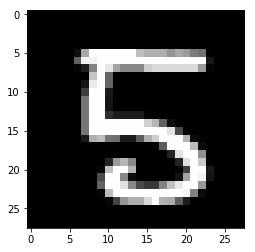

In [29]:
plt.imshow(np.reshape(t_data[i].data.cpu().numpy(),(28,28)), cmap='gray')
plt.show()

Try to reconstruct the above:

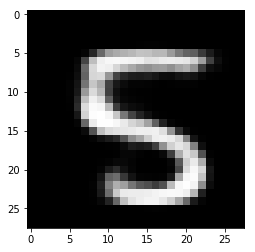

In [31]:
a,b,c = test(t_data[i].cuda())

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()

The below generates an image from white noise

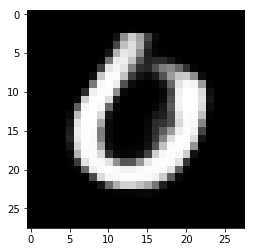

In [21]:
a = test.sample()

a = test.decode(a)

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()